# Оглавление

* [Установка библиотек](#установка-бибилиотек)
* [Чтение данных](#чтение-данных)
* [EDA](#eda)
    * [Engine_has_gas](#1-engine_has_gas)
    * [Transmission](#2-transmission)
    * [Engine_type](#3-engine_type)
* [Data Preparation](#data-preparation)
* [Реграссионый анализ](#регрессионный-анализ)
* [Заключение](#заключение)

## Установка бибилиотек <a class="anchor" id="установка-бибилиотек"></a>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from tqdm import tqdm
from itertools import permutations
import mplcyberpunk
from sklearn.preprocessing import LabelEncoder, StandardScaler
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from sklearn.metrics import mean_squared_error
plt.style.use(["dark_background", "cyberpunk"])


## Чтение данных <a class="anchor" id="чтение-данных"></a>


Ссылка на датасет https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog

In [3]:
data = pd.read_csv('data/cars.csv')

In [4]:
data.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

In [5]:
data.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


## EDA <a class="anchor" id="eda"></a>


In [6]:
data.describe(include="all")

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
count,38531,38531,38531,38531,38531.000000,38531.000000,38531,38531,38531,38521.000000,...,38531,38531,38531,38531,38531,38531,38531,38531,38531,38531.000000
unique,55,1118,2,12,NaN,NaN,6,2,3,NaN,...,2,2,2,2,2,2,2,2,2,NaN
top,Volkswagen,Passat,mechanical,black,NaN,NaN,gasoline,False,gasoline,NaN,...,True,False,False,False,False,False,False,False,True,NaN
freq,4243,1423,25633,7705,NaN,NaN,24065,37184,25647,NaN,...,23396,29907,27904,29227,24811,31943,28369,22528,22325,NaN
mean,NaN,NaN,NaN,NaN,248864.638447,2002.943734,NaN,NaN,NaN,2.055161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.577249
std,NaN,NaN,NaN,NaN,136072.376530,8.065731,NaN,NaN,NaN,0.671178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.826569
min,NaN,NaN,NaN,NaN,0.000000,1942.000000,NaN,NaN,NaN,0.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,158000.000000,1998.000000,NaN,NaN,NaN,1.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000
50%,NaN,NaN,NaN,NaN,250000.000000,2003.000000,NaN,NaN,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000
75%,NaN,NaN,NaN,NaN,325000.000000,2009.000000,NaN,NaN,NaN,2.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.000000


### Посмортим распеределение данных относительно разных групп

### 1. Engine_has_gas <a class="anchor" id="1-engine_has_gas"></a>


In [7]:
avg_price = data.groupby('engine_has_gas')['price_usd'].agg('mean')

In [8]:
gas = avg_price.index
price = avg_price.values

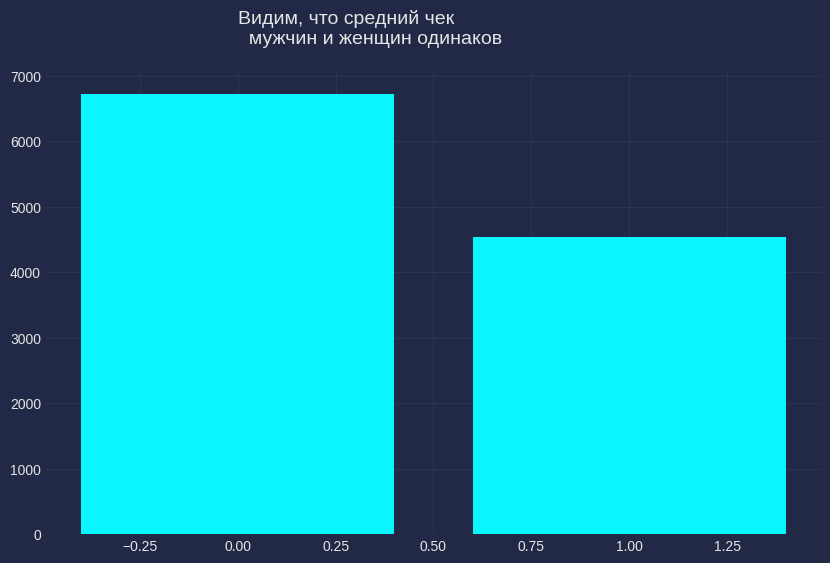

In [12]:
figure = plt.figure(figsize=(10, 6))
plt.bar(gas, price)
plt.text(0, 7500, "Видим, что средний чек\n  мужчин и женщин одинаков", fontsize=14)
plt.show();

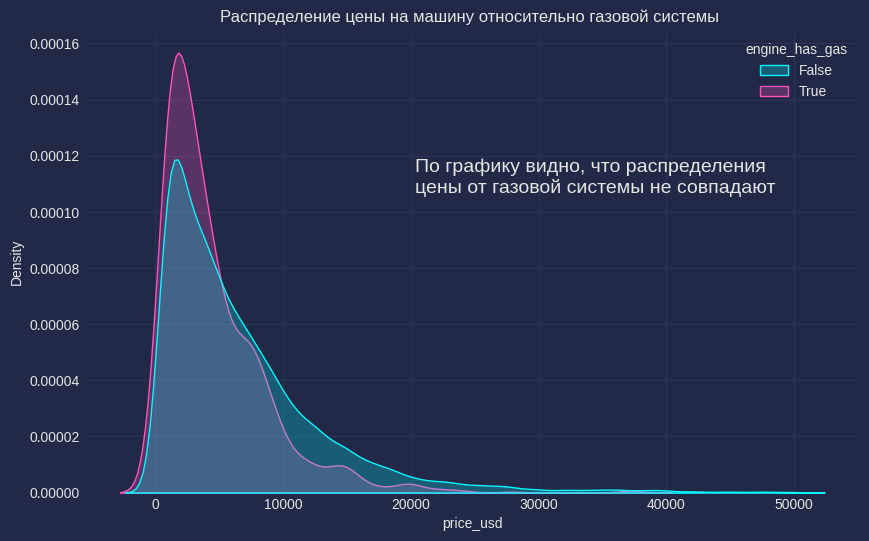

In [17]:
text_for_plot = """
По графику видно, что распределения
цены от газовой системы не совпадают
"""

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='price_usd', hue='engine_has_gas', fill=True, common_norm=False)
plt.title('Распределение цены на машину относительно газовой системы ')
plt.text(20300, 10*1e-5, text_for_plot, fontsize=14)

plt.show()

Сформулируем гипотезу:
- $H_0:$ Распределения совпадают
- $H_1:$ Распределения не совпадают

Проведем KS-тест, для проверки нашей гипотезы. Проверим её при уровне значимости $\alpha = 0.05$

In [18]:
group1_data = data[data['engine_has_gas'] == False]['price_usd']
group2_data = data[data['engine_has_gas'] == True]['price_usd']
ks_stat, p_value = st.ks_2samp(group1_data, group2_data)
if p_value > 0.05:
    print("\nНе можем отвергнуть H0")
else:
    print("\nОтвергаем H0")



Отвергаем H0


Из теста можем сделать вывод, что распределения не совпадают

Следовательно, в зависимости от того, на газу машина или нет, меняется ее цена

Теперь рассмотрим распеределения пробег автомобиля

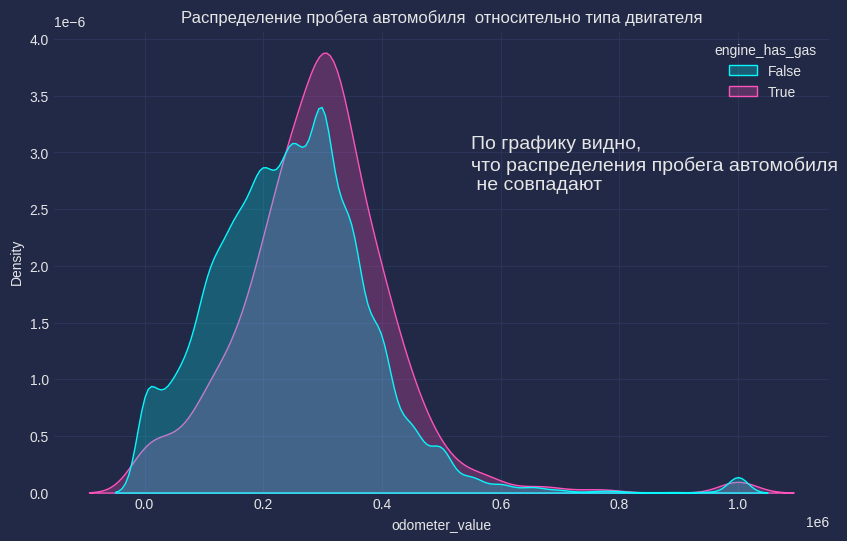

In [24]:
text_for_plot = """
По графику видно, 
что распределения пробега автомобиля\n не совпадают
"""

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='odometer_value', hue='engine_has_gas', fill=True, common_norm=False)
plt.title('Распределение пробега автомобиля  относительно типа двигателя')
plt.text(0.55e6, 2.5e-6, text_for_plot, fontsize=14)

plt.show()

Также проведем статистический тест

In [25]:
group1_data = data[data['engine_has_gas'] == False]['odometer_value']
group2_data = data[data['engine_has_gas'] == True]['odometer_value']
ks_stat, p_value = st.ks_2samp(group1_data, group2_data)
if p_value > 0.05:
    print("\nНе можем отвергнуть H0")
else:
    print("\nОтвергаем H0")
print(f"KS statistic for price: {ks_stat}, p-value: {p_value}")


Отвергаем H0
KS statistic for price: 0.17520359835779642, p-value: 2.260707898418369e-35


Из теста можно убедиться в том, что распределения не совпадают, так как значение `p-value` $\approx 2*10^{-35} < 0.05 = \alpha$

Проверим является ли разница средних в этой группе статистически значимой.
Сформулируем гипотезу:
- $H_0:$ Нет статистически значимых различий между выборками
- $H_1:$ Присутствуют статистически значимые различия между выборками

Для этого проведем тест Манна-Уитни при уровне значимости $\alpha = 0.05$ 

In [26]:
statistic, p_value = st.mannwhitneyu(group1_data, group2_data)
print(f'MW statistic: {statistic}, p-value: {p_value}')

MW statistic: 19743713.0, p-value: 7.075570703147875e-40


Из теста можно убедиться в том, что в выборках присутствуют статистически значимые различия, так как значение `p-value` $\approx 7*10^{-40} < 0.05 = \alpha$

Построим точную и доверительные оценки

In [27]:
diff_mean = np.mean(group1_data) - np.mean(group2_data)

print(f"Точная оценка разницы между группами: {diff_mean}")

Точная оценка разницы между группами: -42809.130992730905


In [28]:
diffs = []
for _ in tqdm(range(1000)):
    sample1 = np.random.choice(group1_data, len(group1_data), replace=True)
    sample2 = np.random.choice(group2_data, len(group2_data), replace=True)
    diffs.append(np.mean(sample1) - np.mean(sample2))

lower_ci, upper_ci = np.percentile(diffs,q=[2.5, 97.5]).round(2)

print(f"Интервальная оценка разницы между группами: {lower_ci, upper_ci}")

100%|██████████| 1000/1000 [00:01<00:00, 911.18it/s]

Интервальная оценка разницы между группами: (-49973.38, -35787.94)


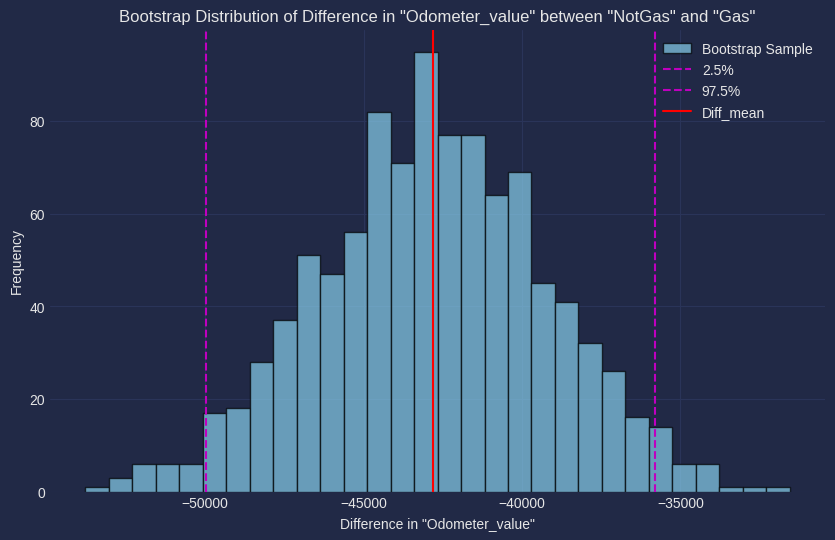

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(diffs, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Bootstrap Sample')
plt.axvline(x=lower_ci, color='m', linestyle='--', label='2.5%')
plt.axvline(x=upper_ci, color='m', linestyle='--', label='97.5%')
plt.axvline(x=diff_mean, color='r', linestyle='-', label='Diff_mean')
plt.title(f'Bootstrap Distribution of Difference in "Odometer_value" between "NotGas" and "Gas"')
plt.xlabel(f'Difference in "Odometer_value"')
plt.ylabel('Frequency')
plt.legend()
plt.show()

В заключении, можно сказать, что для машин на газу пробег значительно выше

## 2. Transmission <a class="anchor" id="2-transmission"></a>


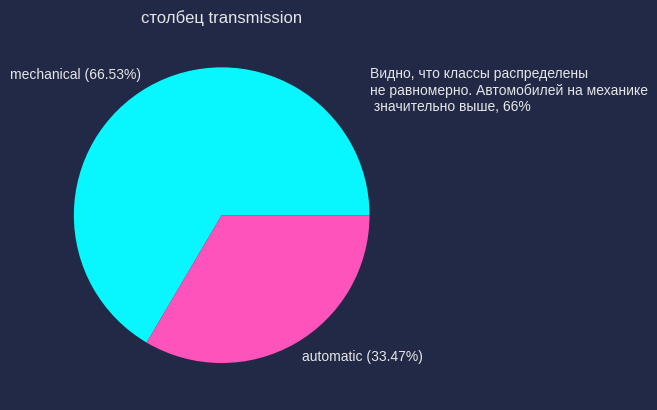

In [34]:
pie_vals_dependents = list(zip(data['transmission'].value_counts().index, round(data['transmission'].value_counts(normalize=True) * 100, 2).values))

plt.pie(
    data['transmission'].value_counts(), 
    labels=[i[0] + f" ({i[1]}%)" for i in pie_vals_dependents]
)
text_for_pie_plot = """
Видно, что классы распределены
не равномерно. Автомобилей на механике\n значительно выше, 66%
"""
plt.text(1, 0.6, text_for_pie_plot)
plt.title('столбец transmission')
plt.show();

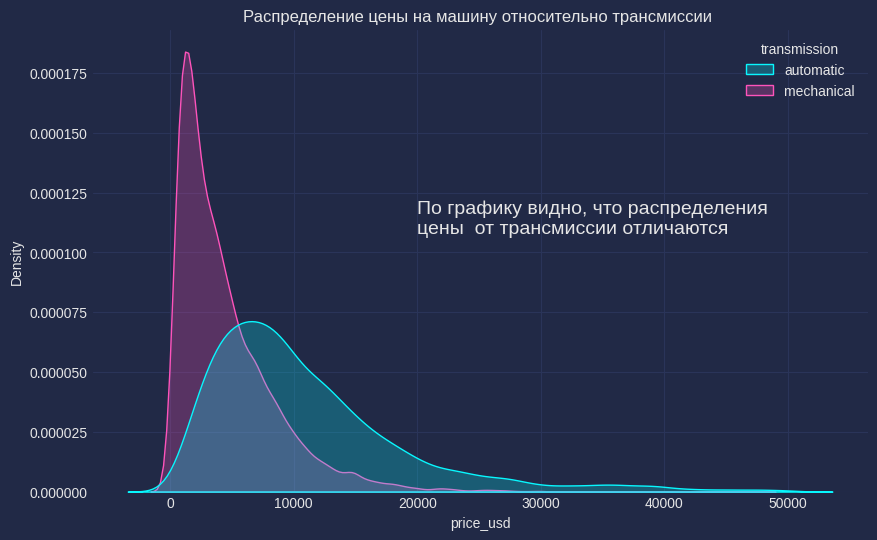

In [37]:
text_for_plot = """
По графику видно, что распределения
цены  от трансмиссии отличаются
"""

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='price_usd', hue='transmission', fill=True, common_norm=False)
plt.title('Распределение цены на машину относительно трансмиссии ')
plt.text(20000, 100*1e-6, text_for_plot, fontsize=14)

plt.show();

Можно сразу проверить на значимость средних для этих групп

In [38]:
group1_data = data[data['transmission'] == 'automatic']['price_usd']
group2_data = data[data['transmission'] == 'mechanical']['price_usd']
statistic, p_value = st.mannwhitneyu(group1_data, group2_data)
if p_value > 0.05:
    print("\nНе можем отвергнуть H0")
else:
    print("\nОтвергаем H0")
print(f"KS statistic for price: {ks_stat}, p-value: {p_value}")


Отвергаем H0
KS statistic for price: 0.17520359835779642, p-value: 0.0


Из теста можно убедиться в том, что в выборках присутствуют статистически значимые различия, так как значение `p-value` $= 0 < 0.05 = \alpha$

Теперь аналогичным образом построим точную и доверительную оценку

In [39]:
diff_mean = np.mean(group1_data) - np.mean(group2_data)

print(f"Точная оценка разницы между группами: {diff_mean}")

Точная оценка разницы между группами: 6489.5413045673595


In [40]:
diffs = []
for _ in tqdm(range(1000)):
    sample1 = np.random.choice(group1_data, len(group1_data), replace=True)
    sample2 = np.random.choice(group2_data, len(group2_data), replace=True)
    diffs.append(np.mean(sample1) - np.mean(sample2))

lower_ci, upper_ci = np.percentile(diffs,q=[2.5, 97.5]).round(2)

print(f"Интервальная оценка разницы между группами: {lower_ci, upper_ci}")

100%|██████████| 1000/1000 [00:00<00:00, 2533.99it/s]

Интервальная оценка разницы между группами: (6338.4, 6633.71)


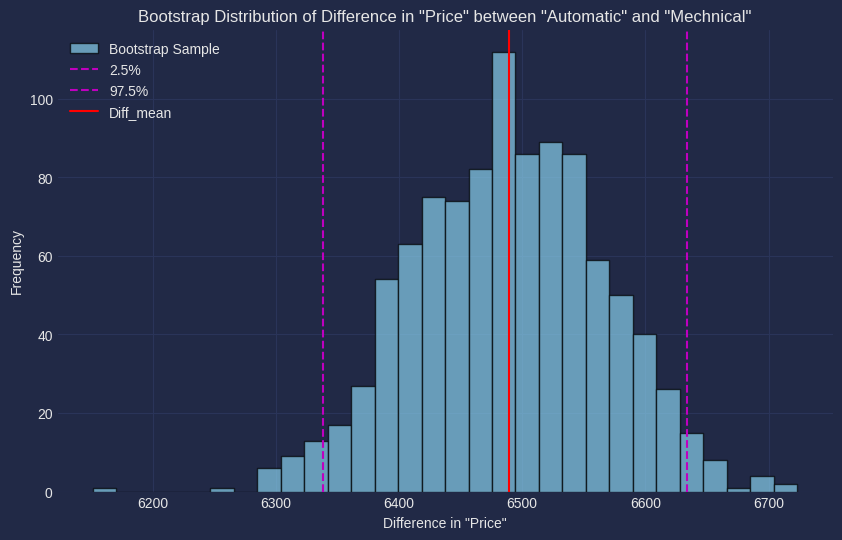

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(diffs, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Bootstrap Sample')
plt.axvline(x=lower_ci, color='m', linestyle='--', label='2.5%')
plt.axvline(x=upper_ci, color='m', linestyle='--', label='97.5%')
plt.axvline(x=diff_mean, color='r', linestyle='-', label='Diff_mean')
plt.title(f'Bootstrap Distribution of Difference in "Price" between "Automatic" and "Mechnical"')
plt.xlabel(f'Difference in "Price"')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Также можно сделать вывод, что для автоматической коробки цена автомобиля будет выше

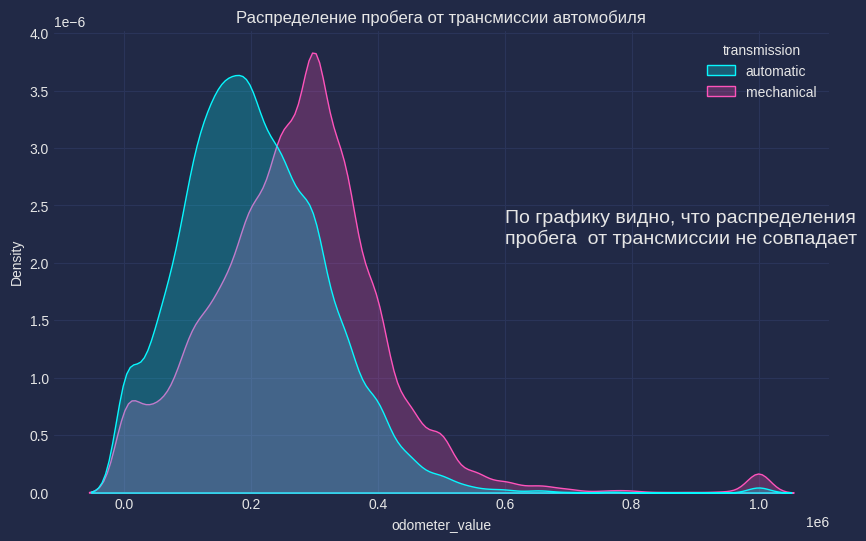

In [46]:
text_for_plot = """
По графику видно, что распределения
пробега  от трансмиссии не совпадает
"""

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='odometer_value', hue='transmission', fill=True, common_norm=False)
plt.title('Распределение пробега от трансмиссии автомобиля')
plt.text(0.6*1e6, 2*1e-6, text_for_plot, fontsize=14)

plt.show();

Проведем KS-test для данных групп

In [48]:
group1_data = data[data['transmission'] == 'automatic']['odometer_value']
group2_data = data[data['transmission'] == 'mechanical']['odometer_value']
ks_stat, p_value = st.ks_2samp(group1_data, group2_data)
if p_value > 0.05:
    print("\nНе можем отвергнуть H0")
else:
    print("\nОтвергаем H0")
print(f"KS statistic for price: {ks_stat}, p-value: {p_value}")


Отвергаем H0
KS statistic for price: 0.2608959383787823, p-value: 0.0


Из теста можно сделать вывод, что распеределения не совпадают

### 3. Engine_type <a class="anchor" id="3-engine_type"></a>


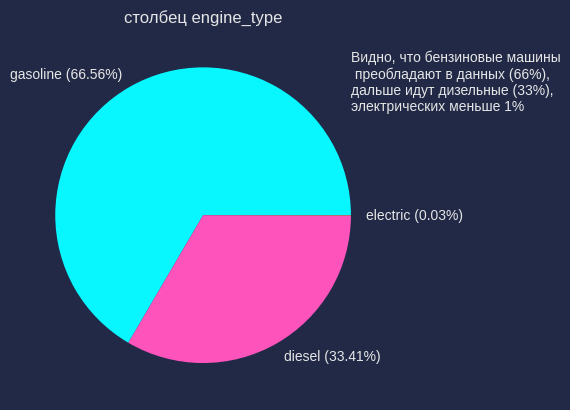

In [53]:
pie_vals_dependents = list(zip(data['engine_type'].value_counts().index, round(data['engine_type'].value_counts(normalize=True) * 100, 2).values))

plt.pie(
    data['engine_type'].value_counts(), 
    labels=[i[0] + f" ({i[1]}%)" for i in pie_vals_dependents]
)
text_for_pie_plot = """
Видно, что бензиновые машины
 преобладают в данных (66%),
дальше идут дизельные (33%),
электрических меньше 1%
"""
plt.text(1, 0.6, text_for_pie_plot)
plt.title('столбец engine_type')
plt.show();

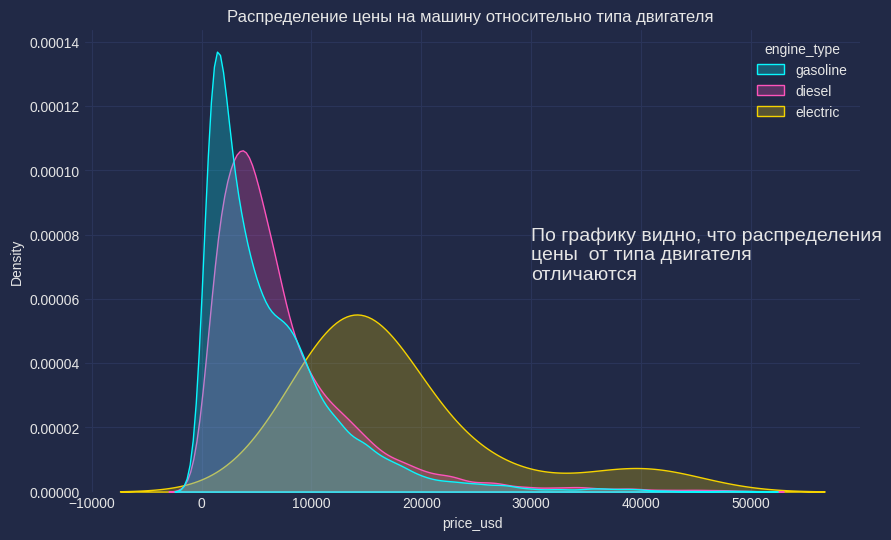

In [57]:
text_for_plot = """
По графику видно, что распределения
цены  от типа двигателя
отличаются
"""

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='price_usd', hue='engine_type', fill=True, common_norm=False)
plt.title('Распределение цены на машину относительно типа двигателя ')
plt.text(30000, .6e-4, text_for_plot, fontsize=14)

plt.show();

Проведем попарные KS-тесты и сравним с тестом Фишера

In [59]:
gas_data, dis_data, elect_data = (data[data['engine_type'] == 'gasoline'],
                             data[data['engine_type'] == 'diesel'],
                             data[data['engine_type'] == 'electric'])
other_data = [gas_data, dis_data, elect_data]

In [58]:
colors = ["gasoline", "diesel", "electric"]

In [60]:
perm = permutations(range(len(other_data)),2)
i = 0
print("Сравнения с использованием теста КS:")
for elem in perm:
    if i == len(other_data):
        break
    stat, p_val = st.ks_2samp(other_data[elem[0]]['price_usd'], other_data[elem[1]]['price_usd'])
    print(f"For {colors[elem[0]]} and {colors[elem[1]]}")
    print(f"p-value = {p_val}")
    i += 1

segments = [gas_data['price_usd'], dis_data['price_usd'], elect_data['price_usd']]   
print("\nСравнения с использованием теста Фишера (ANOVA):")
stat, p_val = st.f_oneway(*segments)
print(f"p-value = {p_val}")

Сравнения с использованием теста КS:
For gasoline and diesel
p-value = 5.740376336223971e-181
For gasoline and electric
p-value = 5.867962304242059e-07
For diesel and gasoline
p-value = 5.740376336223971e-181

Сравнения с использованием теста Фишера (ANOVA):
p-value = 5.361182099818859e-68


Видим, что p-value для попарных тестов и теста Фишера достаточно мал, что может нам говорить о том, что распределения отличаются

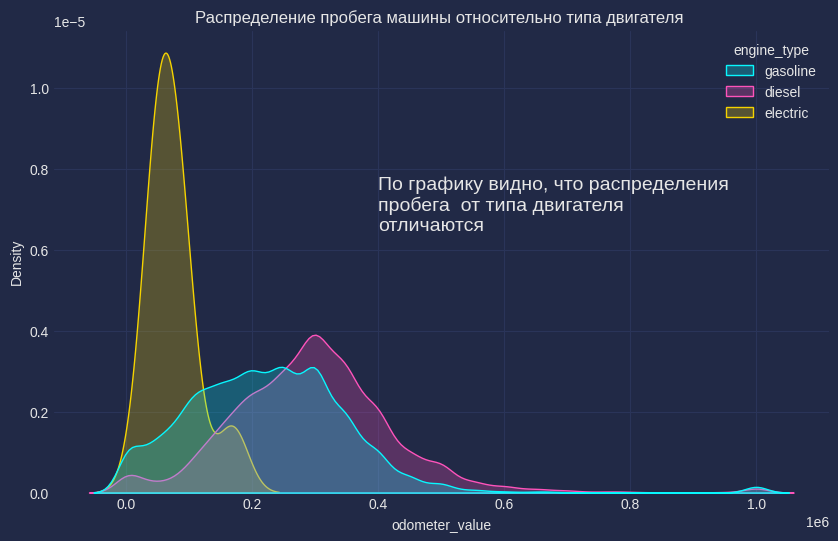

In [63]:
text_for_plot = """
По графику видно, что распределения
пробега  от типа двигателя
отличаются
"""

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='odometer_value', hue='engine_type', fill=True, common_norm=False)
plt.title('Распределение пробега машины относительно типа двигателя ')
plt.text(0.4e6, .6e-5, text_for_plot, fontsize=14)

plt.show();

Из графика видно, что распределения не совпадают.

Проверим это статистическим тестом

In [64]:
perm = permutations(range(len(other_data)),2)
i = 0
print("Сравнения с использованием теста КS:")
for elem in perm:
    if i == len(other_data):
        break
    stat, p_val = st.ks_2samp(other_data[elem[0]]['odometer_value'], other_data[elem[1]]['odometer_value'])
    print(f"For {colors[elem[0]]} and {colors[elem[1]]}")
    print(f"p-value = {p_val}")
    i += 1

segments = [gas_data['odometer_value'], dis_data['odometer_value'], elect_data['odometer_value']]   
print("\nСравнения с использованием теста Фишера (ANOVA):")
stat, p_val = st.f_oneway(*segments)
print(f"p-value = {p_val}")

Сравнения с использованием теста КS:
For gasoline and diesel
p-value = 0.0
For gasoline and electric
p-value = 2.9738421538327525e-06
For diesel and gasoline
p-value = 0.0

Сравнения с использованием теста Фишера (ANOVA):
p-value = 0.0


Видим, что и попарные сравнения, и тест Фишера показывают, что распределения не совпадают

Исследуем на мультиколлинеарность численные признаки

In [68]:
numerical_col = data.select_dtypes(include=['int', 'float']).columns.to_list()
numerical_col

['odometer_value',
 'year_produced',
 'engine_capacity',
 'price_usd',
 'number_of_photos',
 'up_counter',
 'duration_listed']

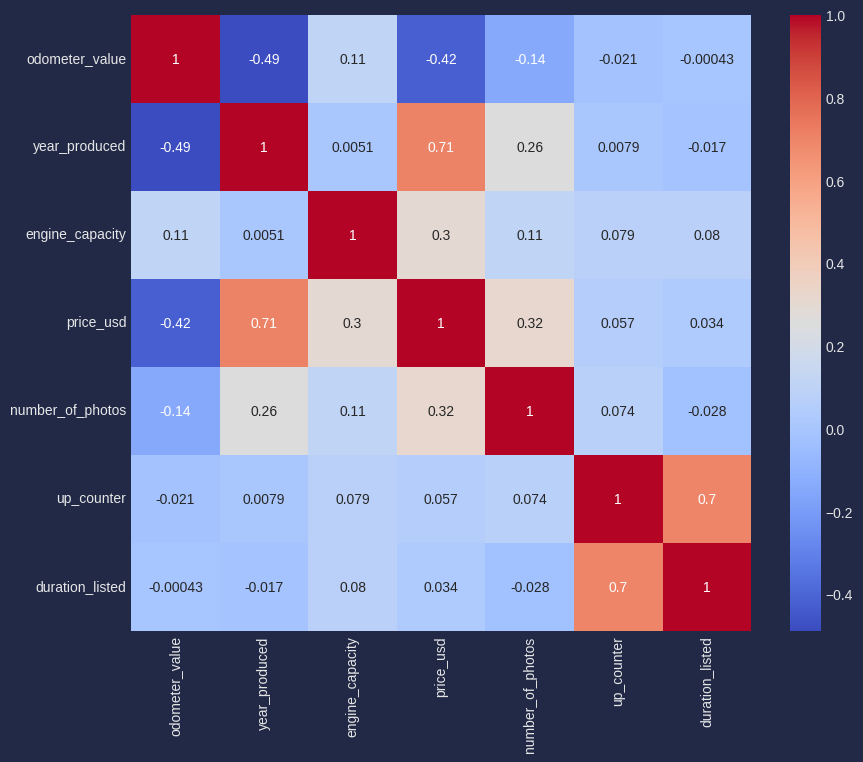

In [69]:
cor = data[numerical_col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor, cmap='coolwarm', annot=True);

Видим, что коллеарность есть между ценой и годом выпуска, а также между duration_listed и up_counter

## Data Preparation  <a class="anchor" id="data-preparation"></a>


In [70]:
clear_data = data.copy()

In [71]:
clear_data.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [72]:
categorical_features = ['transmission', 'color', 'engine_fuel', 'engine_has_gas', 'engine_type']

In [75]:
le = LabelEncoder()


In [76]:
for column in categorical_features:
    clear_data[column] = le.fit_transform(clear_data[column])

In [78]:
cols = numerical_col + categorical_features
cols

['odometer_value',
 'year_produced',
 'engine_capacity',
 'price_usd',
 'number_of_photos',
 'up_counter',
 'duration_listed',
 'transmission',
 'color',
 'engine_fuel',
 'engine_has_gas',
 'engine_type']

In [79]:
scaler = StandardScaler()
for el in cols:
    clear_data[[el]] = scaler.fit_transform(clear_data[[el]])

In [81]:
clear_data[cols].head()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,transmission,color,engine_fuel,engine_has_gas,engine_type
0,-0.432604,0.874857,0.662782,0.662723,-0.106523,-0.076377,-0.572366,-1.409738,0.977997,0.722289,-0.190329,0.70867
1,0.302309,-0.117007,1.407751,-0.255127,0.385834,0.870803,0.021474,-1.409738,-0.969729,0.722289,-0.190329,0.70867
2,1.125411,-0.240990,0.662782,-0.597376,-0.927119,1.286638,0.624176,-1.409738,0.699751,0.722289,-0.190329,0.70867
3,-1.755446,-0.488956,1.407751,0.522556,-0.106523,0.593580,0.048063,0.709351,-0.969729,0.722289,-0.190329,0.70867
4,0.228818,-0.240990,0.662782,-0.700967,0.714072,-0.214989,-0.652135,-1.409738,-1.247976,0.722289,-0.190329,0.70867


In [83]:
clear_data = clear_data.dropna()

## Регрессионный анализ  <a class="anchor" id="регрессионый-анализ"></a>


In [84]:
X = sm.add_constant(clear_data[cols].drop(columns=['price_usd']))
model1 = sm.OLS(clear_data['price_usd'], X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_usd   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     5878.
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:36:55   Log-Likelihood:                -35662.
No. Observations:               38521   AIC:                         7.135e+04
Df Residuals:                   38509   BIC:                         7.145e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0001      0.003     -0.042      0.967      -0.006       0.006
odometer_value      -0.1600      0.004    -42.453      0.000      -0.167      -0.153
year_produced        0.5510      0.004    139.809      0.000       0.543       0.559
engine_capacity      0.2397      0.004     65.783      0.000       0.233       0.247
number_of_photos     0.1009      0.003     30.765      0.000       0.094       0.107
up_counter           0.0033      0.004      0.757      0.449      -0.005       0.012
duration_listed      0.0206      0.004      4.706      0.000       0.012       0.029
transmission        -0.1164      0.004    -29.560      0.000      -0.124      -0.109
color               -0.0058      0.003     -1.839      0.066      -0.012       0.000
engine_fuel          0.1047      0.028      3.724      0.000       0.050       0.160
engine_has_gas      -0.0038      0.005     -0.776      0.438      -0.013       0.006
engine_type         -0.2093      0.028     -7.387      0.000      -0.265      -0.154
==============================================================================
Omnibus:                    23196.823   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           327237.214
Skew:                           2.663   Prob(JB):                         0.00
Kurtosis:                      16.248   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

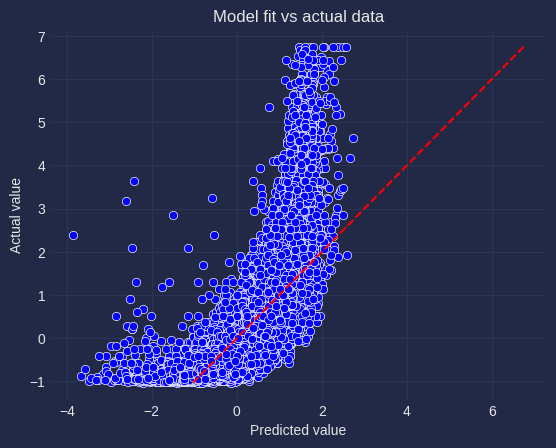

In [85]:
sns.scatterplot(x=model1.fittedvalues, y=clear_data['price_usd'], c='b');
sns.lineplot(x=clear_data['price_usd'], y=clear_data['price_usd'], c='r', linestyle='--');
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Model fit vs actual data')

plt.show()

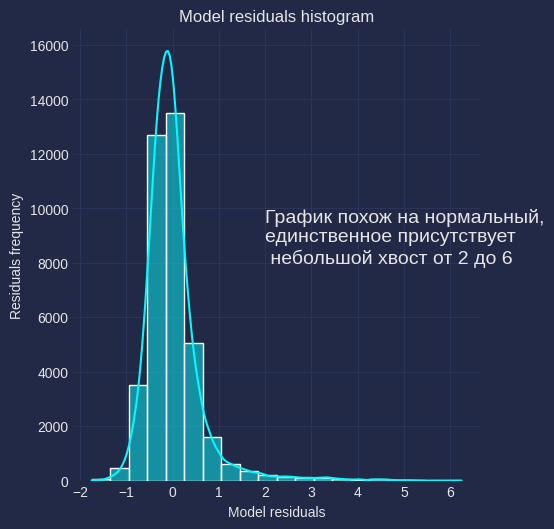

In [105]:

text_for_plot = """График похож на нормальный,
единственное присутствует
 небольшой хвост от 2 до 6"""
sns.displot(model1.resid, bins=20, kde=True);
plt.xlabel('Model residuals')
plt.ylabel('Residuals frequency')
plt.title('Model residuals histogram')
plt.text(2, 8000, text_for_plot, fontsize=14)
plt.show()

Проведем проверку на гетероскедатичность. Для этого сформулируем две гипотезы:
- $H_0:$ Гетероскедатичность отсутствует
- $H_1:$ Присутствует гетероскедатичность

Проверим их с помощью теста Уайта

In [90]:
vals = het_white(model1.resid, X)
print("p-value теста Уайта:", vals[1])

p-value теста Уайта: 0.0


`p-value` $=0$ делаем вывод о том, что в данных присутствует гетероскедатичность. 

In [91]:
X = sm.add_constant(clear_data[cols].drop('price_usd',axis=1))
model_lasso = sm.OLS(clear_data['price_usd'], X).fit_regularized(method='elastic_net', alpha=0.05, L1_wt=1)
model_lasso.params

const               0.000000
odometer_value     -0.103214
year_produced       0.547535
engine_capacity     0.201571
number_of_photos    0.069338
up_counter          0.000000
duration_listed     0.000000
transmission       -0.097253
color               0.000000
engine_fuel         0.000000
engine_has_gas      0.000000
engine_type        -0.043945
dtype: float64

In [92]:
lasso_cols = ['odometer_value', 'year_produced', 'engine_capacity', 'number_of_photos', 'transmission', 'engine_type']

In [97]:
X = sm.add_constant(clear_data[lasso_cols])
model2 = sm.OLS(clear_data['price_usd'], X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_usd   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                 1.073e+04
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:07:27   Log-Likelihood:                -35713.
No. Observations:               38521   AIC:                         7.144e+04
Df Residuals:                   38514   BIC:                         7.150e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0001      0.003     -0.038      0.970      -0.006       0.006
odometer_value      -0.1616      0.004    -42.920      0.000      -0.169      -0.154
year_produced        0.5513      0.004    139.808      0.000       0.544       0.559
engine_capacity      0.2396      0.004     66.387      0.000       0.233       0.247
number_of_photos     0.1008      0.003     30.985      0.000       0.094       0.107
transmission        -0.1184      0.004    -30.188      0.000      -0.126      -0.111
engine_type         -0.1072      0.003    -32.191      0.000      -0.114      -0.101
==============================================================================
Omnibus:                    23146.165   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           324641.991
Skew:                           2.657   Prob(JB):                         0.00
Kurtosis:                      16.192   Cond. No.                         2.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

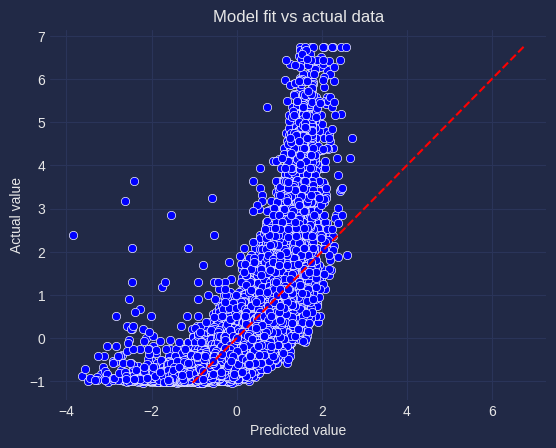

In [98]:
sns.scatterplot(x=model2.fittedvalues, y=clear_data['price_usd'], c='b');
sns.lineplot(x=clear_data['price_usd'], y=clear_data['price_usd'], c='r', linestyle='--');
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Model fit vs actual data')

plt.show()

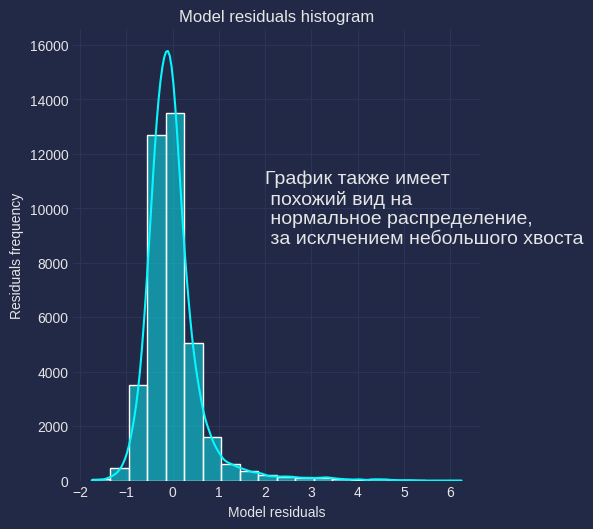

In [104]:
text_for_plot = """
График также имеет
 похожий вид на 
 нормальное распределение,
 за исклчением небольшого хвоста
"""

sns.displot(model2.resid, bins=20, kde=True);
plt.xlabel('Model residuals')
plt.ylabel('Residuals frequency')
plt.title('Model residuals histogram')
plt.text(2, 8000, text_for_plot, fontsize=14)
plt.show()

## Заключение <a class="anchor" id="заключение"></a>


В результате получились две модели, у каждой из которых примерно одинаковый коэффициент $R^2 \approx 0.626$. Чуть выше показатели AIC и BIC у второй модели. 
